In [137]:
#Importing modules necessary for data analysis and preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [138]:
#loading data
data=pd.read_csv('task_data.csv')
data.columns = data.columns.str.strip()



In [139]:
#Basic exploration
data.describe()


,ID,Cardiomegaly,Heart width,Lung width,xx,yy,xy,normalized_diff,Polygon Area Ratio,Heart area,Lung area
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,26.027027,0.756757,206.351351,413.810811,2286.269336,4730.006310,-805.167329,-0.344805,0.274054,34402.378378,81486.783784
std,15.039737,0.434959,29.283306,36.771696,638.801580,1095.268932,398.022620,0.145481,0.057254,6187.119516,14730.330918
min,1.000000,0.000000,148.000000,341.000000,1214.923424,3076.280456,-1755.344699,-0.651767,0.181388,22583.000000,51018.000000
25%,13.000000,1.000000,189.000000,396.000000,1833.841218,3969.359793,-995.735145,-0.432405,0.223339,29120.000000,70212.000000
50%,25.000000,1.000000,204.000000,407.000000,2197.853422,4812.389570,-831.472858,-0.360424,0.264131,33591.000000,83123.000000
75%,40.000000,1.000000,223.000000,432.000000,2465.903392,5376.834707,-638.531109,-0.284012,0.320787,39256.000000,92058.000000
max,50.000000,1.000000,266.000000,498.000000,3961.102462,8378.677729,211.472229,-0.031457,0.421824,46381.000000,116542.000000


In [140]:
data.head()

,ID,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,1,0,172,405,"0,424691358",1682.360871,3153.671880,-638.531109,-0.304239,"68,8186",0.213446,"679,4873689",24898,75419
1,2,1,159,391,"0,4066496164",1526.660960,5102.159054,-889.678405,-0.539387,"73,92564",0.203652,"788,6589419",29851,94494
2,5,0,208,400,"0,52",2465.903392,5376.834707,-1755.344699,-0.371163,"69,33974",0.320787,"862,3229369",33653,66666
3,7,1,226,435,"0,5195402299",2509.063593,6129.821270,-1025.079806,-0.419123,"84,14868",0.317545,"906,724959",42018,82596
4,8,1,211,420,"0,5023809524",2368.770135,5441.767075,-1493.040062,-0.393442,"73,78347",0.263542,"864,2396777",35346,85631


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          37 non-null     int64  
 1   Cardiomegaly                37 non-null     int64  
 2   Heart width                 37 non-null     int64  
 3   Lung width                  37 non-null     int64  
 4   CTR - Cardiothoracic Ratio  37 non-null     object 
 5   xx                          37 non-null     float64
 6   yy                          37 non-null     float64
 7   xy                          37 non-null     float64
 8   normalized_diff             37 non-null     float64
 9   Inscribed circle radius     37 non-null     object 
 10  Polygon Area Ratio          37 non-null     float64
 11  Heart perimeter             37 non-null     object 
 12  Heart area                  37 non-null     int64  
 13  Lung area                   37 non-nu

In [142]:
#We can see that data has some problems to fix in cols 4,9 and 11. 
#Looking at the head it's obvious that the problem is , instead of . in data
wrong_cols=['CTR - Cardiothoracic Ratio','Inscribed circle radius','Heart perimeter']
for col in wrong_cols:
    data[col]=data[col].astype(str).str.replace(",",".")
    data[col]=data[col].astype(float)
#checking if fix is successful
data.info()
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          37 non-null     int64  
 1   Cardiomegaly                37 non-null     int64  
 2   Heart width                 37 non-null     int64  
 3   Lung width                  37 non-null     int64  
 4   CTR - Cardiothoracic Ratio  37 non-null     float64
 5   xx                          37 non-null     float64
 6   yy                          37 non-null     float64
 7   xy                          37 non-null     float64
 8   normalized_diff             37 non-null     float64
 9   Inscribed circle radius     37 non-null     float64
 10  Polygon Area Ratio          37 non-null     float64
 11  Heart perimeter             37 non-null     float64
 12  Heart area                  37 non-null     int64  
 13  Lung area                   37 non-nu

The proportion of outcomes is:
Cardiomegaly
1    0.756757
0    0.243243
Name: proportion, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

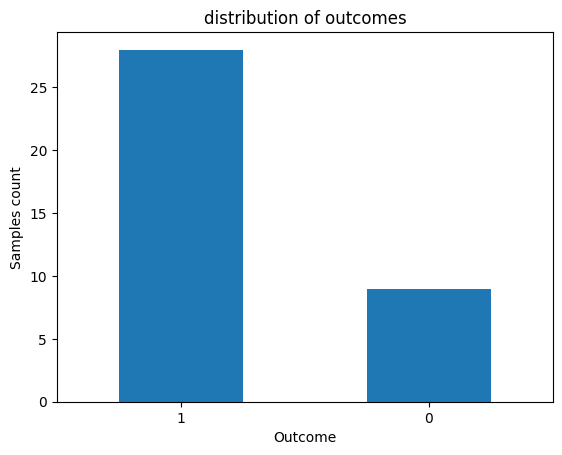

In [143]:
#Checking balance of classes to choose optimal training split
counts=data['Cardiomegaly'].value_counts()
print(f"The proportion of outcomes is:\n{data['Cardiomegaly'].value_counts(1)}")
counts.plot(kind='bar',title='distribution of outcomes',rot=0)
plt.xlabel("Outcome")
plt.ylabel("Samples count")
plt.show

In [144]:
#As we can conclude from the distribution, we should use approximately 80/20 train/test split to get fair results
#Let's choose our X and Y variable
Y=data['Cardiomegaly']
X=data.drop(columns=['ID','Cardiomegaly'])

In [145]:
#Now we can define the splits
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.26,random_state=42,stratify=Y)
#Let's check the results
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(27, 12)
(10, 12)
(27,)


In [146]:
#After reading ML.md I decided that the most suitable model for this task will be logistic regression
#Because of that, we need to scale our values to be similar to each other (e.g. between 0 and 1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#We teach our scaler on training data (fit)
X_train_scaled=scaler.fit_transform(X_train)
#Then we use trained scaler on test data
X_test_scaled=scaler.transform(X_test)
#The result of the transformation
X_train_scaled[:5]


array([[ 1.75453155,  0.28786029,  1.43352252,  1.87662186, -0.22554864,
         0.31481819,  1.52672763,  2.87771511,  1.16059844,  0.82097718,
         1.81748035, -0.70894129],
       [ 0.08725673,  0.28786029, -0.12672574,  0.25943783, -1.31495841,
         1.31198132,  1.27543055,  0.74466059, -0.47104783, -0.88537983,
        -0.17581484, -0.16892598],
       [-0.2027041 , -1.23931428,  0.6254816 , -0.26395242, -0.79951944,
        -0.53738956,  0.33398994, -1.2174296 ,  1.24716196, -0.81985343,
        -0.84141491, -1.65919668],
       [ 2.1532277 ,  0.36967321,  1.74397047,  2.66711223,  0.6135183 ,
        -1.61193141,  1.4030189 ,  1.25444085,  1.56813232,  2.12653134,
         2.05301655, -0.25001075],
       [-1.10883172,  0.83327977, -1.51194276, -0.81968547, -0.96912937,
        -0.0759364 , -0.08815594, -0.67977394, -1.73704619, -1.23246876,
        -1.16632868,  1.17237042]])

In [147]:
#Great, our data is now fully ready for training. As I mentioned before, I will start with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model=LogisticRegression(random_state=42)
#Proceeding to training
model.fit(X_train_scaled,Y_train)
#Now predicting the train Y based on train X
predicted_train_Y=model.predict(X_train_scaled)


In [148]:
#Results of our test are following:
tr_accuracy=accuracy_score(Y_train,predicted_train_Y)
tr_precision=precision_score(Y_train,predicted_train_Y,pos_label=1,zero_division=0)
tr_recall=recall_score(Y_train,predicted_train_Y,pos_label=1,zero_division=0)
tr_f1=f1_score(Y_train,predicted_train_Y,pos_label=1,zero_division=0)
print(f"Predicted trained Y with trained X metrics: \n accuracy: {tr_accuracy}\n precision: {tr_precision}\n recall: {tr_recall}\n f1 : {tr_f1}")

Predicted trained Y with trained X metrics: 
 accuracy: 0.8888888888888888
 precision: 0.8695652173913043
 recall: 1.0
 f1 : 0.9302325581395349


In [149]:
#Training data scores are little too high for this small of a sample size, possible overfitting
#Now we can proceed to the final test - predicting on test data
predicted_test_Y=model.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, predicted_test_Y)
test_precision = precision_score(Y_test, predicted_test_Y, pos_label=1, zero_division=0)
test_recall = recall_score(Y_test, predicted_test_Y, pos_label=1, zero_division=0)
test_f1 = f1_score(Y_test, predicted_test_Y, pos_label=1, zero_division=0)
print(f" accuracy: {test_accuracy}\n precision: {test_precision}\n recall: {test_recall}\n f1 : {test_f1}")

 accuracy: 0.7
 precision: 0.8571428571428571
 recall: 0.75
 f1 : 0.8


In [150]:
#For this sample, results are far from satisfying, but before we change params in model, we need to do cross-validation
#Importing necessary modules for cross-validation
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

#Defining the metrics we want to track
scorers = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'recall_class_0': make_scorer(recall_score, pos_label=0, zero_division=0),
    'recall_class_1': make_scorer(recall_score, pos_label=1, zero_division=0)
}

#Setting up the cross-validation strategy
#Using StratifiedKFold to keep class balance (76/24) in each split
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Creating a Pipeline to combine scaling and modeling
#This prevents data leakage during CV
pipe_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))])

#Running CV for baseline model
#Using the whole dataset (X, y)
cv_results_baseline = cross_validate(
    pipe_baseline,
    X, Y,
    cv=cv_strategy,
    scoring=scorers
)

#Showing average results for the baseline model
print("CV Results for Baseline Model")
print(f"Avg. Accuracy:      {cv_results_baseline['test_accuracy'].mean():.4f}")
print(f"Avg. F1-score (Macro):  {cv_results_baseline['test_f1_macro'].mean():.4f}")
print(f"Avg. Recall (Class 0 - Healthy): {cv_results_baseline['test_recall_class_0'].mean():.4f}")
print(f"Avg. Recall (Class 1 - Sick):  {cv_results_baseline['test_recall_class_1'].mean():.4f}")

CV Results for Baseline Model
Avg. Accuracy:      0.7357
Avg. F1-score (Macro):  0.6181
Avg. Recall (Class 0 - Healthy): 0.4000
Avg. Recall (Class 1 - Sick):  0.8533


In [151]:
#Running CV again, but for a balanced model
#Our baseline model was biased (low recall for class 0). Let's try to fix it.
#Creating a new Pipeline with class_weight='balanced'
pipe_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, class_weight='balanced'))]) #The only change


#Running cross-validation
#Using the same cv_strategy and scorers from the previous cell
cv_results_balanced = cross_validate(
    pipe_balanced,
    X, Y,
    cv=cv_strategy,
    scoring=scorers
)

#Showing average results for the balanced model
print("CV Results for Balanced Model (class_weight='balanced')")
print(f"Avg. Accuracy: {cv_results_balanced['test_accuracy'].mean():.4f}")
print(f"Avg. F1-score (Macro):  {cv_results_balanced['test_f1_macro'].mean():.4f}")
print(f"Avg. Recall (Class 0 - Healthy): {cv_results_balanced['test_recall_class_0'].mean():.4f}")
print(f"Avg. Recall (Class 1 - Sick):  {cv_results_balanced['test_recall_class_1'].mean():.4f}")

CV Results for Balanced Model (class_weight='balanced')
Avg. Accuracy: 0.7036
Avg. F1-score (Macro):  0.6474
Avg. Recall (Class 0 - Healthy): 0.7000
Avg. Recall (Class 1 - Sick):  0.7067


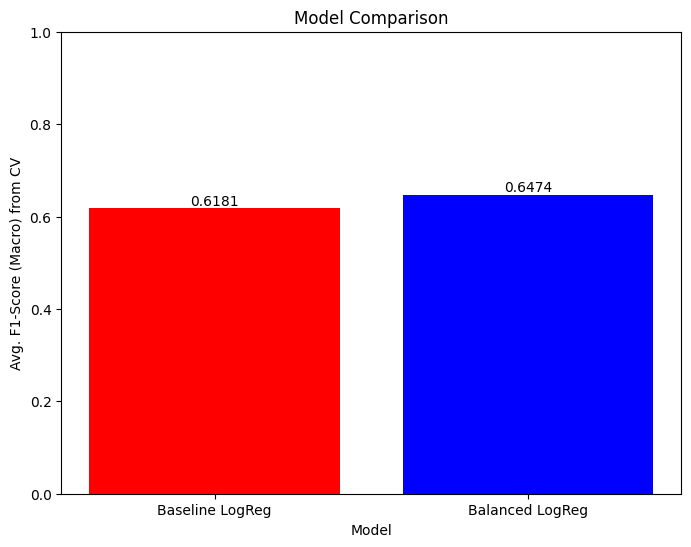

In [152]:
#Setting up the data for our comparison plot
#We will compare the Avg. F1-score (Macro) from our CV results
model_names = ['Baseline LogReg', 'Balanced LogReg']

#Getting the F1-scores from our previous CV results
f1_scores = [cv_results_baseline['test_f1_macro'].mean(), # F1-Macro from Baseline
            cv_results_balanced['test_f1_macro'].mean()] # F1-Macro from Balanced 
            

#Creating the bar plot
plt.figure(figsize=(8, 6))
bars=plt.bar(model_names, f1_scores, color=['red', 'blue'])
plt.xlabel("Model")
plt.ylabel("Avg. F1-Score (Macro) from CV")
plt.title("Model Comparison")
plt.ylim(0, 1.0) # Set Y-axis from 0 to 1

#Adding the score value on top of each bar
plt.bar_label(bars, fmt='%.4f')

plt.show()

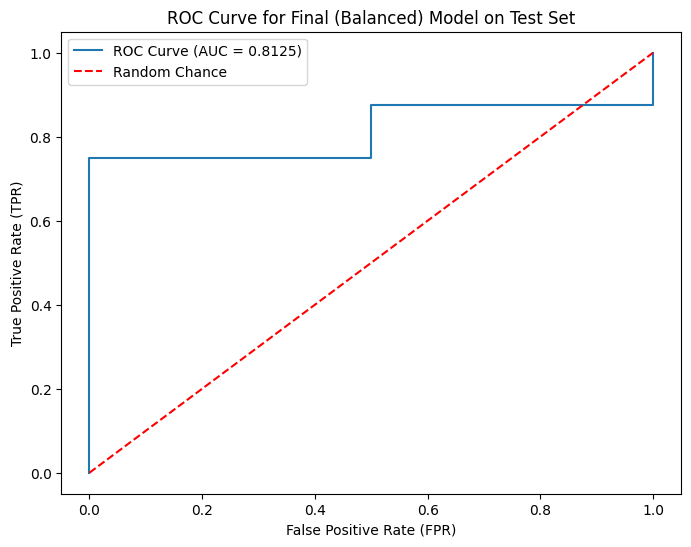

In [153]:
#Importing modules for ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

#Using the final_model (our best model, Balanced LogReg) from Cell 16
#We need probabilities for the '1' class (Sick)

final_model=LogisticRegression(random_state=42, class_weight='balanced')

final_model.fit(X_train_scaled, Y_train)

Y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]

#Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

#Calculate the AUC (Area Under the Curve)
auc_score = roc_auc_score(Y_test, Y_pred_proba)

#Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Chance') #Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Final (Balanced) Model on Test Set")
plt.legend()
plt.show()

In [154]:
#Let's try to add further improvement to our LogReg model by adding feture engineering
#Creating a new feature: Heart_Lung_Area_Ratio
X_engineered = X.copy()
X_engineered['Heart_Lung_Area_Ratio'] = X_engineered['Heart area'] / X_engineered['Lung area']
print("New feature 'Heart_Lung_Area_Ratio' created.")
print(X_engineered.head())

New feature 'Heart_Lung_Area_Ratio' created.
   Heart width  Lung width  CTR - Cardiothoracic Ratio           xx  \
0          172         405                    0.424691  1682.360871   
1          159         391                    0.406650  1526.660960   
2          208         400                    0.520000  2465.903392   
3          226         435                    0.519540  2509.063593   
4          211         420                    0.502381  2368.770135   

            yy           xy  normalized_diff  Inscribed circle radius  \
0  3153.671880  -638.531109        -0.304239                 68.81860   
1  5102.159054  -889.678405        -0.539387                 73.92564   
2  5376.834707 -1755.344699        -0.371163                 69.33974   
3  6129.821270 -1025.079806        -0.419123                 84.14868   
4  5441.767075 -1493.040062        -0.393442                 73.78347   

   Polygon Area Ratio  Heart perimeter  Heart area  Lung area  \
0            0.213446   

In [155]:
#Let's see if the new feature helps our best model so far.

print("Running CV for Balanced LogReg with Engineered Features")

#We use pipe_balanced 
#We use cv_strategy and scorers
cv_results_balanced_eng = cross_validate(
    pipe_balanced,
    X_engineered, Y, # Using X_engineered
    cv=cv_strategy,
    scoring=scorers
)

#Showing average results
print("CV Results for Balanced LogReg + Engineered Feature")
print(f"Avg. F1-score (Macro):  {cv_results_balanced_eng['test_f1_macro'].mean():.4f}")
print(f"Avg. Recall (Class 0 - Healthy): {cv_results_balanced_eng['test_recall_class_0'].mean():.4f}")

Running CV for Balanced LogReg with Engineered Features
CV Results for Balanced LogReg + Engineered Feature
Avg. F1-score (Macro):  0.6198
Avg. Recall (Class 0 - Healthy): 0.7000


In [156]:
#We can see that this feature didn't make our model better, so we now try another classic ML model, SVM
#Testing a new model
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42, class_weight='balanced'))
])

cv_results_svm = cross_validate(
    pipe_svm,
    X, Y,
    cv=cv_strategy,
    scoring=scorers
)

#Showing average results (SVM)
print("CV Results for SVM Model (class_weight='balanced')")
print(f"Avg. Accuracy:      {cv_results_svm['test_accuracy'].mean():.4f}")
print(f"Avg. Recall (Macro):    {cv_results_svm['test_recall_macro'].mean():.4f}")
print(f"Avg. F1-score (Macro):  {cv_results_svm['test_f1_macro'].mean():.4f}")
print(f"Avg. Recall (Class 0 - Healthy): {cv_results_svm['test_recall_class_0'].mean():.4f}")
print(f"Avg. Recall (Class 1 - Sick):  {cv_results_svm['test_recall_class_1'].mean():.4f}")

CV Results for SVM Model (class_weight='balanced')
Avg. Accuracy:      0.7857
Avg. Recall (Macro):    0.7600
Avg. F1-score (Macro):  0.7309
Avg. Recall (Class 0 - Healthy): 0.7000
Avg. Recall (Class 1 - Sick):  0.8200


In [157]:
#There is significant improvement comparing to LogReg, let's check if feature engineering helps our SVM model
print("Running CV for SVM Model with Engineered Features")

#We use pipe_svm
#We use cv_strategy and scorers
cv_results_svm_eng = cross_validate(
    pipe_svm,
    X_engineered, Y, # Using X_engineered
    cv=cv_strategy,
    scoring=scorers
)

#Showing average results (Full Report)
print("CV Results for SVM Model + Engineered Feature")
print(f"Avg. Accuracy:      {cv_results_svm_eng['test_accuracy'].mean():.4f}")
print(f"Avg. Precision (Macro): {cv_results_svm_eng['test_precision_macro'].mean():.4f}")
print(f"Avg. Recall (Macro):    {cv_results_svm_eng['test_recall_macro'].mean():.4f}")
print(f"Avg. F1-score (Macro):  {cv_results_svm_eng['test_f1_macro'].mean():.4f}")
print(f"Avg. Recall (Class 0 - Healthy): {cv_results_svm_eng['test_recall_class_0'].mean():.4f}")
print(f"Avg. Recall (Class 1 - Sick):  {cv_results_svm_eng['test_recall_class_1'].mean():.4f}")

Running CV for SVM Model with Engineered Features
CV Results for SVM Model + Engineered Feature
Avg. Accuracy:      0.7857
Avg. Precision (Macro): 0.7250
Avg. Recall (Macro):    0.7600
Avg. F1-score (Macro):  0.7309
Avg. Recall (Class 0 - Healthy): 0.7000
Avg. Recall (Class 1 - Sick):  0.8200


Final SVM model (with probability=True) trained.
Final Model Metrics on Test Set (Balanced SVM)
                   precision    recall  f1-score   support

Class 0 (Healthy)       0.40      1.00      0.57         2
   Class 1 (Sick)       1.00      0.62      0.77         8

         accuracy                           0.70        10
        macro avg       0.70      0.81      0.67        10
     weighted avg       0.88      0.70      0.73        10



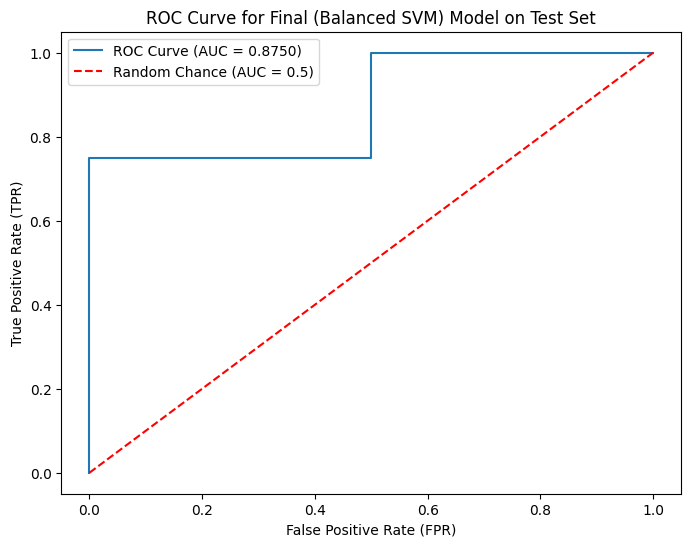

In [158]:
#We found SVM is our best model. Let's train it and plot its ROC curve.

from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

#We must add probability=True to SVC to get ROC curve data
final_svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42, class_weight='balanced', probability=True))
])

#Train it on ALL available training data
final_svm_pipe.fit(X_train_scaled, Y_train)
print("Final SVM model (with probability=True) trained.")

#Evaluate this final model on the unseen test set
y_pred_final_svm = final_svm_pipe.predict(X_test_scaled)

print("Final Model Metrics on Test Set (Balanced SVM)")
print(classification_report(Y_test, y_pred_final_svm, target_names=['Class 0 (Healthy)', 'Class 1 (Sick)'], zero_division=0))

#Get probabilities for ROC Curve
y_pred_proba_svm = final_svm_pipe.predict_proba(X_test_scaled)[:, 1]

#Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_svm)

#Calculate the AUC (Area Under the Curve)
auc_score = roc_auc_score(Y_test, y_pred_proba_svm)

#Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Chance (AUC = 0.5)')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Final (Balanced SVM) Model on Test Set")
plt.legend()
plt.show()

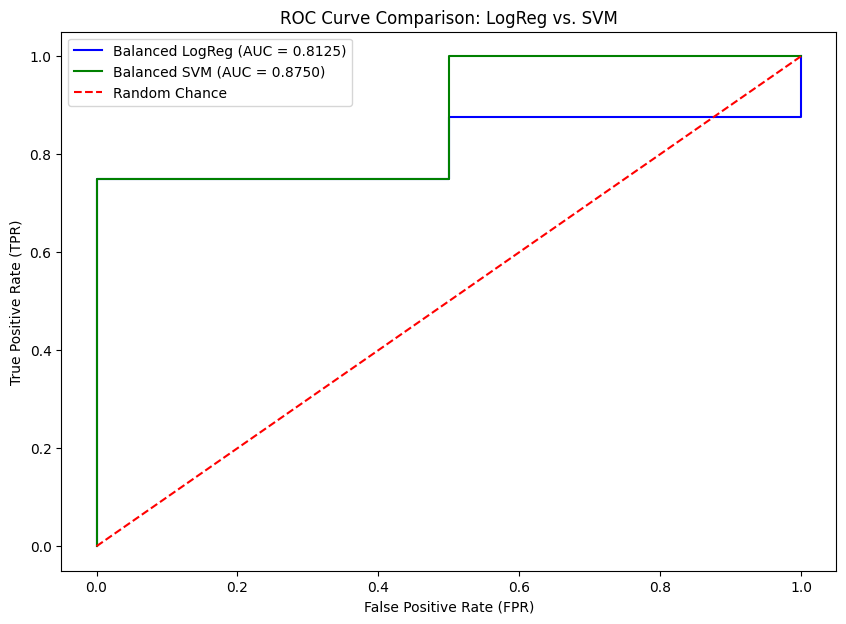

In [159]:
#Plotting both models on one chart to see which is better.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Define and train the Balanced LogReg model
final_logreg = LogisticRegression(random_state=42, class_weight='balanced')
final_logreg.fit(X_train_scaled, Y_train)

#Define and train the Balanced SVM model
final_svm = SVC(random_state=42, class_weight='balanced', probability=True)
final_svm.fit(X_train_scaled, Y_train)

#Get probabilities for both models
y_pred_proba_logreg = final_logreg.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_svm = final_svm.predict_proba(X_test_scaled)[:, 1]

#Calculate ROC points and AUC scores
fpr_logreg, tpr_logreg, _ = roc_curve(Y_test, y_pred_proba_logreg)
auc_logreg = roc_auc_score(Y_test, y_pred_proba_logreg)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(Y_test, y_pred_proba_svm)

#Plotting both ROC Curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Balanced LogReg (AUC = {auc_logreg:.4f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'Balanced SVM (AUC = {auc_svm:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Chance')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: LogReg vs. SVM")
plt.legend()
plt.show()

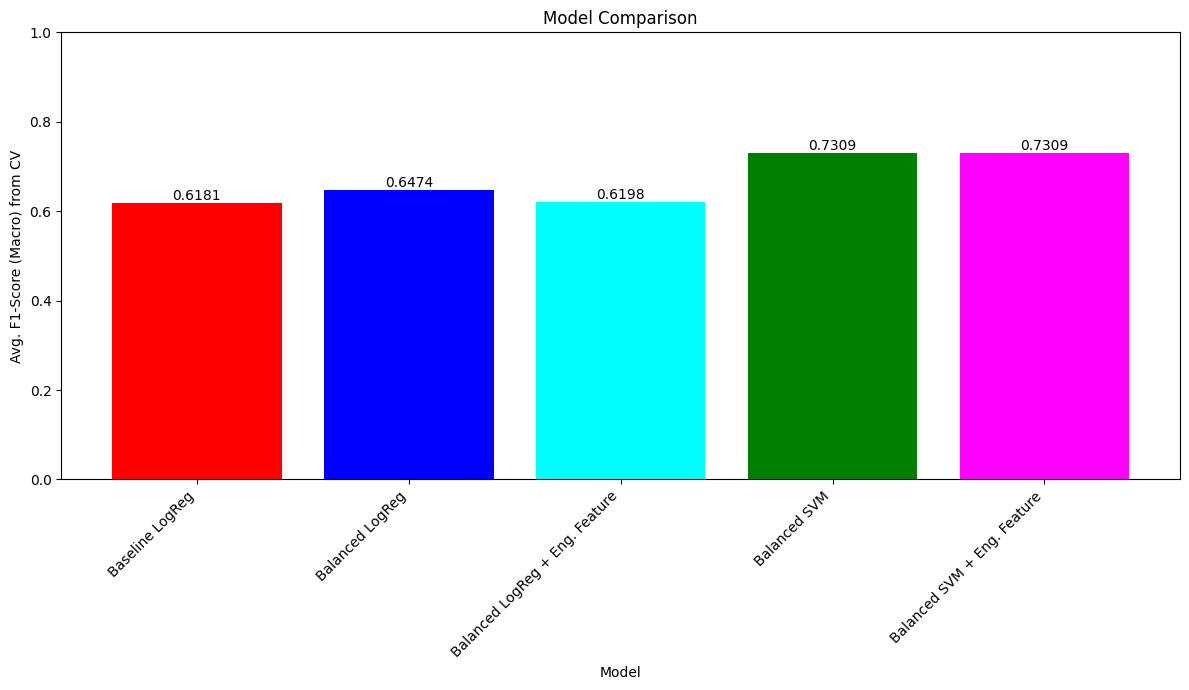

In [160]:
# Updating the plot with all our results.

model_names = [
    'Baseline LogReg', 
    'Balanced LogReg', 
    'Balanced LogReg + Eng. Feature',
    'Balanced SVM',
    'Balanced SVM + Eng. Feature'
]

# Getting the F1-scores from all our CV results
f1_scores = [
    cv_results_baseline['test_f1_macro'].mean(),
    cv_results_balanced['test_f1_macro'].mean(),
    cv_results_balanced_eng['test_f1_macro'].mean(),
    cv_results_svm['test_f1_macro'].mean(),
    cv_results_svm_eng['test_f1_macro'].mean()
]
    
# Creating the bar plot
plt.figure(figsize=(12, 7))
bars = plt.bar(model_names, f1_scores, color=['red', 'blue', 'cyan', 'green', 'magenta']) 
plt.xlabel("Model")
plt.ylabel("Avg. F1-Score (Macro) from CV")
plt.title("Model Comparison")
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha="right")

plt.bar_label(bars, fmt='%.4f')
plt.tight_layout()
plt.show()